### Сгенерировать маску границы для экстраполяции

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import cv2
from PIL import Image
import PIL.ImageOps 

from common_functions import show, save_image

In [29]:
name_img = "6"
i_img = "png"
pixel_border = 3

###  Image Segmentation using Contour Detection

(680, 680, 3)


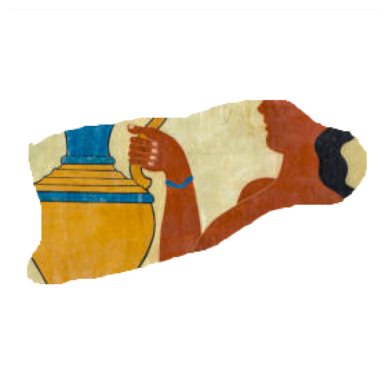

In [30]:
sample_image = cv2.imread(f"pics/{name_img}.{i_img}", cv2.COLOR_RGB2GRAY)
img = cv2.cvtColor(sample_image,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
print(sample_image.shape)

show(img)

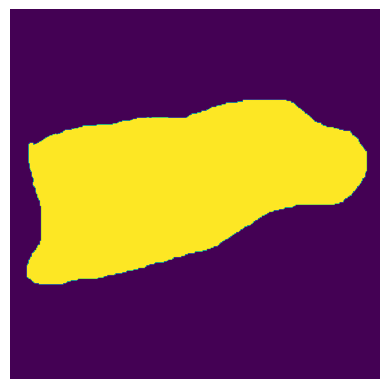

In [31]:
# _, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

# Применяем пороговое значение для отделения цветной части от белой
_, binary_image = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)

show(binary_image)

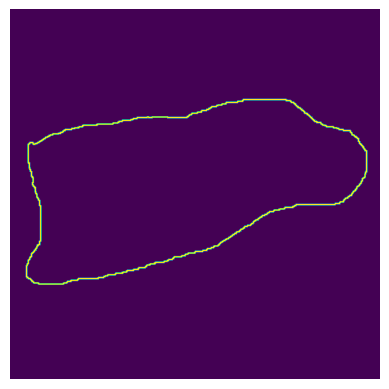

In [32]:
edges = cv2.dilate(cv2.Canny(binary_image, 0, 255), None)

show(edges)

(680, 680, 3)
Изображение сохранено как pics/6_.png


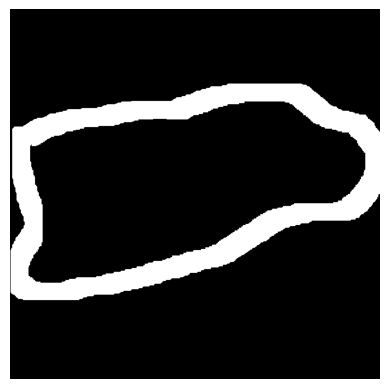

In [33]:
pixel_border =25

dilated = cv2.dilate(edges.copy(), None, iterations=pixel_border)
mask = cv2.bitwise_not(binary_image)
dilated = cv2.bitwise_and(cv2.cvtColor(dilated, cv2.COLOR_GRAY2BGR), cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR))
dilated = cv2.dilate(dilated, None, iterations=3) # !!!

print(dilated.shape)
show(dilated)

save_image(dilated, f"pics/{name_img}_.png")


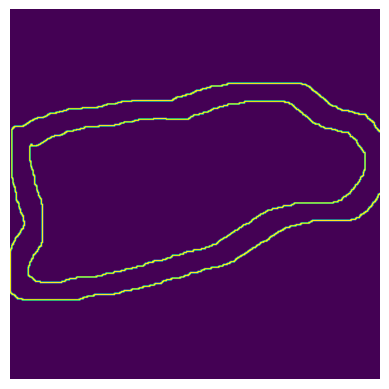

In [34]:
edgess = cv2.dilate(cv2.Canny(dilated,0,255),None)

show(edgess)

### Весь пайплайн получения маски экстраполяции в одной функции


In [35]:
def get_extr_mask(img_path, img_name, pixel_border):
    gray = cv2.imread(img_path, cv2.COLOR_RGB2GRAY)
    img = cv2.cvtColor(sample_image,cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

    # Применяем пороговое значение для отделения цветной части от белой
    _, binary_image = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)

    edges = cv2.dilate(cv2.Canny(binary_image, 0, 255), None)

    dilated = cv2.dilate(edges.copy(), None, iterations=pixel_border)
    mask = cv2.bitwise_not(binary_image)
    dilated = cv2.bitwise_and(cv2.cvtColor(dilated, cv2.COLOR_GRAY2BGR), cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR))
    dilated = cv2.dilate(dilated, None, iterations=1)

    print(dilated.shape)
    show(dilated)

    save_image(dilated, f"pics/{img_name}_.png")
    

Пример использования

(680, 680, 3)
Изображение сохранено как pics/6_.png


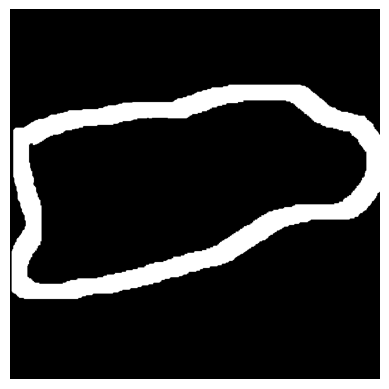

In [36]:
get_extr_mask('pics/6.png', '6', 25)